<a href="https://colab.research.google.com/github/gitgitWi/python-lecture/blob/master/lec_20200428_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

mkdate : 2020/04/28

# Keras Fashion MNIST dataset

1. 패션 MNIST 데이터셋 임포트  

2. 데이터 탐색

3. 데이터전처리

4. 모델구성
  층(레이어 설정)
  모델 컴파일

5. 모델 훈련

6. 정확도 평가

7. 예측만들기

In [13]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [0]:
import tensorflow as tf

In [2]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

print (tf.__version__)

2.2.0-rc3


In [0]:
fashion = keras.datasets.fashion_mnist

In [4]:
(train_imgs, train_labels), (test_imgs, test_labels) = fashion.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [8]:
type(train_imgs), type(train_labels)

(numpy.ndarray, numpy.ndarray)

In [0]:
class_names = ['T-shirt/top', 'Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot',]

## data 탐색

In [9]:
train_imgs.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [25]:
len(train_labels)

60000

In [26]:
train_labels[:20]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7, 9, 1, 0, 6, 4],
      dtype=uint8)

In [10]:
test_imgs.shape, test_labels.shape

((10000, 28, 28), (10000,))

In [11]:
train_imgs[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [12]:
test_labels[0]

9

In [15]:
np.unique(test_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [0]:
??np.bincount

In [16]:
np.bincount(test_labels)

array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000])

In [24]:
list(zip (np.unique(test_labels), np.bincount(test_labels)))

[(0, 1000),
 (1, 1000),
 (2, 1000),
 (3, 1000),
 (4, 1000),
 (5, 1000),
 (6, 1000),
 (7, 1000),
 (8, 1000),
 (9, 1000)]

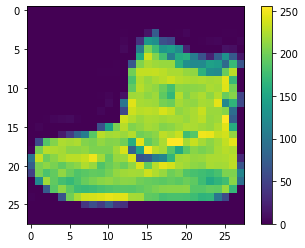

In [27]:
plt.figure()
plt.imshow(train_imgs[0])
plt.colorbar()
plt.grid(False)
plt.show()

x == 21128


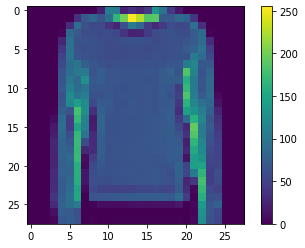

In [41]:
plt.figure()
x = np.random.randint(60000)
print (f"x == {x}")
plt.imshow(train_imgs[x])
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
??plt.imshow

신경망 model 에 주입전 값의 범위를 0~1 사이로 조정, 이렇게 하려면 255로 나눠야 함

train_set과 test_set를 동일한 방식으로 전처리

In [0]:
train_imgs = train_imgs / 255.0
test_imgs = test_imgs / 255.0

x == 52142


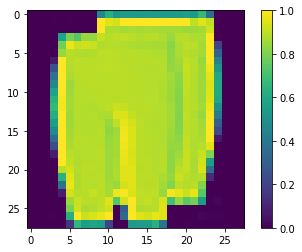

In [45]:
plt.figure()
x = np.random.randint(60000)
print (f"x == {x}")
plt.imshow(train_imgs[x])
plt.colorbar()
plt.grid(False)
plt.show()

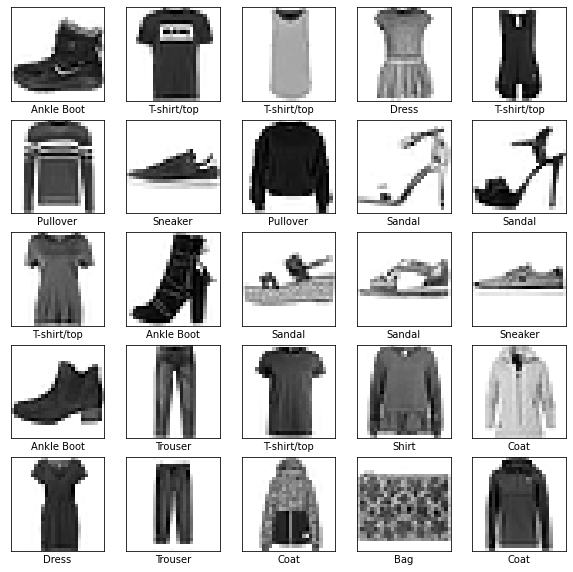

In [46]:
plt.figure(figsize = (10,10))
for i in range(25) :
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_imgs[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## 모델 구성

신경망 모델을 만들려면 모델의 층을 구성한 다음 model을 compile해야 함

### Layer

신경망 기본 구성 요소

layer는 주입된 data에서 표현을 추출

`tr.keras.layers.Dense`와 같은 layers의 parameter는 훈련하는 동안..

#### `Flatten`

- 다차원 배열을 1차원 배열로 전환
- 학습되는 가중치X, reshape하는 기능만

#### `Dense`
- densely-connected layer 또는 fully-connected layer




In [0]:
??keras.layers.Flatten

In [0]:
??keras.layers.Dense

Just your regular densely-connected NN layer.

`Dense` implements the operation:

`output = activation(dot(input, kernel) + bias)` where `activation` is the element-wise activation function passed as the `activation` argument, `kernel` is a weights matrix created by the layer, and `bias` is a bias vector created by the layer (only applicable if `use_bias` is `True`).

```python
keras.layers.Dense(self,
               units,  # number of nodes/nueron
               activation=None,  
               use_bias=True,
               kernel_initializer='glorot_uniform',
               bias_initializer='zeros',
               kernel_regularizer=None,
               bias_regularizer=None,
               activity_regularizer=None,
               kernel_constraint=None,
               bias_constraint=None,
               **kwargs)
```               

activations
- 'softmax' : n개의 확률 반환, 반환된 값의 전체 합은 1

In [49]:
model = keras.Sequential([
                          
                          keras.layers.Flatten(input_shape = (28,28)),
                          keras.layers.Dense(128, activation='relu'),
                          keras.layers.Dense(10, activation='softmax')
])
model

## Model Compile

In [0]:
??keras.Sequential.compile

```python
keras.Sequential.compile(
    optimizer='rmsprop',   # 
    loss=None, 
    metrics=None, 
    loss_weights=None, 
    sample_weight_mode=None, 
    weighted_metrics=None, 
    **kwargs)
```

- `loss` : 훈련 중 model의 오차 측정, model 학습이 올바른 방향으로 향하도록 이 함수를 최소화 해야 함
- `optimizer` : data와 loss function을 바탕으로 model update하는 방법
- `metrics` : train 단계와 test 단계를 monitoring하는 지표


In [0]:
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Model Training

### 신경망 모델 훈련 단계

- 훈련 data 주입
- learning mapping of images and lables
- test set 에 대한 예측 모델 생성, 

```python
keras.Sequential.fit(x=None, 
    y=None, 
    batch_size=None, 
    epochs=1, 
    verbose=1, 
    callbacks=None, 
    validation_split=0.0,
    validation_data=None, 
    shuffle=True, 
    class_weight=None, 
    sample_weight=None, 
    initial_epoch=0, 
    steps_per_epoch=None, 
    validation_steps=None, 
    validation_batch_size=None, 
    validation_freq=1, 
    max_queue_size=10, 
    workers=1, 
    use_multiprocessing=False, 
    **kwargs)
```

In [0]:
??keras.Sequential.fit

In [57]:
model.fit(train_imgs, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4998 - accuracy: 0.8238
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3756 - accuracy: 0.8640
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3377 - accuracy: 0.8767
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3100 - accuracy: 0.8862
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2929 - accuracy: 0.8922


Model 성능 비교

```python
keras.Sequential.evaluate(x=None,
    y=None, 
    batch_size=None, 

    # verbose: 0 or 1. Verbosity mode. 0 = silent, 1 = progress bar.
    verbose=1,
    sample_weight=None, 
    steps=None, 
    callbacks=None, 
    max_queue_size=10, 
    workers=1, 
    use_multiprocessing=False, 
    return_dict=False)
```

In [0]:
??keras.Sequential.evaluate

In [61]:
test_loss, test_acc = model.evaluate(test_imgs, test_labels, verbose= 1)

print (f'Test Accuracy = {test_acc}')

313/313 [==============================] - 0s 1ms/step - loss: 0.3521 - accuracy: 0.8738
Test Accuracy = 0.8737999796867371


test set 의 정확도가 train_set의 정확도보다 조금 낮음 :반복훈련에 의해 overfitting 발생한 것

## Prediction

In [0]:
prediction = model.predict(test_imgs)

위에서 softmax를 통해 10개의 확률을 만들었기 때문에 prediction에 10개 각각의 확률에 대한 정보 저장

In [63]:
prediction[0]

array([1.66897171e-05, 7.04028622e-08, 4.49850995e-06, 3.07594490e-07,
       1.10589335e-05, 6.32192660e-03, 2.78392727e-05, 1.37443408e-01,
       1.41241544e-05, 8.56160104e-01], dtype=float32)

In [65]:
prediction[np.random.randint(10000)]

array([7.5619243e-07, 4.2561037e-12, 2.4351085e-08, 6.5776022e-12,
       3.5001815e-08, 9.9999595e-01, 4.4214637e-08, 5.9150966e-07,
       1.9292075e-07, 2.4690089e-06], dtype=float32)

In [66]:
np.argmax(prediction[0])

9

random test img == 2867
[1.92617383e-02 1.04923965e-03 1.34485930e-01 3.83665115e-02
 1.41296402e-01 8.13152510e-05 6.63500488e-01 1.11123256e-04
 1.35031505e-03 4.96887660e-04]
predicted	== (6, Shirt)
true		== (6, Shirt) 


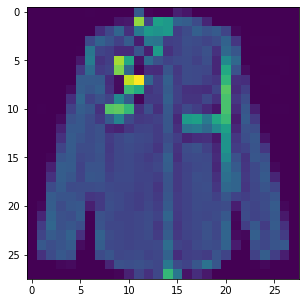

In [110]:
x = np.random.randint(10000)
xp = prediction[x]
print (f"random test img == {x}\n{xp}\npredicted\t== ({np.argmax(xp)}, {class_names[np.argmax(xp)]})\
\ntrue\t\t== ({test_labels[x]}, {class_names[test_labels[x]]}) ")

# np.argmax(xp)

plt.figure(figsize=(5,5))
plt.imshow(test_imgs[x])
plt.show()

In [0]:
def plot_image(i, predictions_array, true_label, img) :
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label: color = 'blue'
    else : color = 'red'

    plt.xlabel(f"{class_names[predicted_label]} {100*np.max(predictions_array):.2f}% {class_names[true_label]}", color = color)

In [0]:
def plot_value_array(i, predictions_array, true_label) :
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color = '#777777')
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

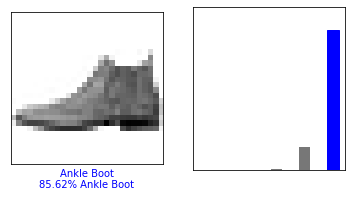

In [122]:
i = 0
plt.figure(figsize = (6,3))
plt.subplot(1,2,1)
plot_image(i, prediction, test_labels, test_imgs)
plt.subplot(1,2,2,)
plot_value_array(i, prediction,  test_labels)
plt.show()

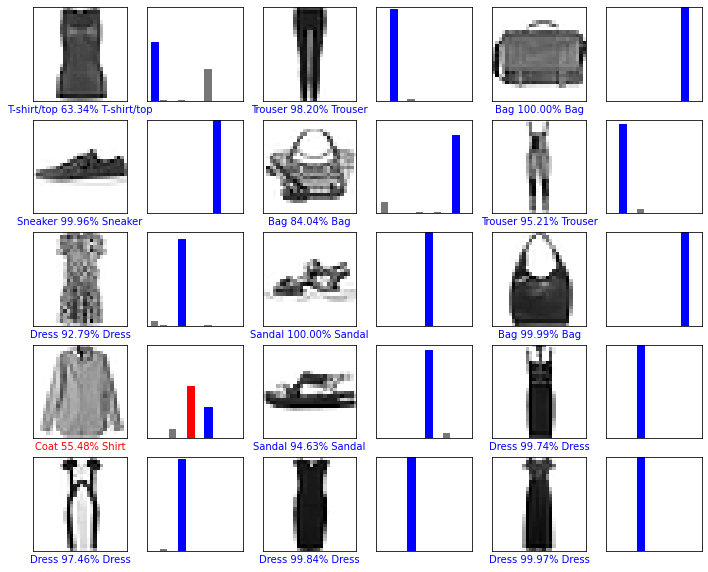

In [151]:
rows, cols = 5, 3
num_imgs = rows * cols
plt.figure(figsize = (2*2*cols, 2*rows))
for i in range(num_imgs) :
    x = np.random.randint(10000)
    plt.subplot(rows, 2*cols, 2*i+1)
    plot_image(x, prediction, test_labels, test_imgs)
    plt.subplot(rows, 2*cols, 2*i+2)
    plot_value_array(x, prediction, test_labels)
plt.show()

## Predict New Data

test_set에서 임의로 하나만 뽑아 신규 data로 가정하고 예측

원래는 아예 새로운 사진을 가져와서 예측해야 함

8153
(28, 28)


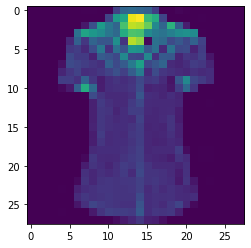

In [152]:
x = np.random.randint(10000); print (x)
img1 = test_imgs[x]
print (img1.shape)

plt.figure(figsize=(4,4))
plt.imshow(img1)
plt.show()

Batch : bundle of samples

make data to batch for model

In [0]:
img_batch = np.expand_dims(img1, 0)

In [135]:
img_batch.shape

(1, 28, 28)

In [154]:
pred_single = model.predict(img_batch)
pred_single

array([[1.3092129e-01, 1.3684234e-04, 3.4934322e-03, 3.2389255e-03,
        4.5545284e-02, 1.7849197e-05, 8.1656992e-01, 4.1716908e-06,
        6.4289074e-05, 8.0017780e-06]], dtype=float32)

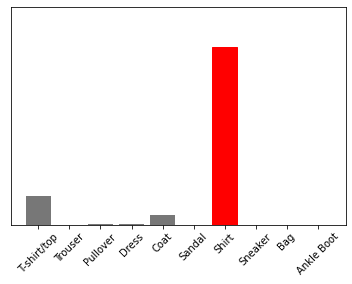

In [155]:
plot_value_array(0, pred_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation = 45)